# Load NI Labview lvm Files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import linecache
from matplotlib.dates import DateFormatter
%matplotlib inline

In [2]:
fName = '../../../Data/2018_02_20-1neg2neg.lvm'
data = pd.read_table(fName, header = 22)
data = data.iloc[:,[0,1,2,3,4]]
data.columns = ['timestamp', 'V1', 'V2', 'I1', 'I2']
units = ['Seconds']+linecache.getline(fName, 18).replace('\n','').split('\t')[1:-1]
date = linecache.getline(fName, 10).replace('\n','').split('\t')[1]
time = linecache.getline(fName, 11).replace('\n','').split('\t')[1]
startTime = dt.datetime.strptime(date + ' ' + time[:8], '%Y/%m/%d %H:%M:%S')
data['time'] = dt.timedelta(seconds = 1)*data.timestamp.values + startTime

In [3]:
data.head()

,timestamp,V1,V2,I1,I2,time
0,0.00,10.387877,-26.370874,-0.396461,0.080758,2018-02-20 15:47:47.000
1,0.01,14.257219,-25.403538,-0.396461,0.093656,2018-02-20 15:47:47.010
2,0.02,12.322548,-22.501532,-0.383563,0.054962,2018-02-20 15:47:47.020
3,0.03,9.420541,-24.436203,-0.319074,0.029166,2018-02-20 15:47:47.030
4,0.04,9.420541,-17.664854,-0.267483,0.016269,2018-02-20 15:47:47.040


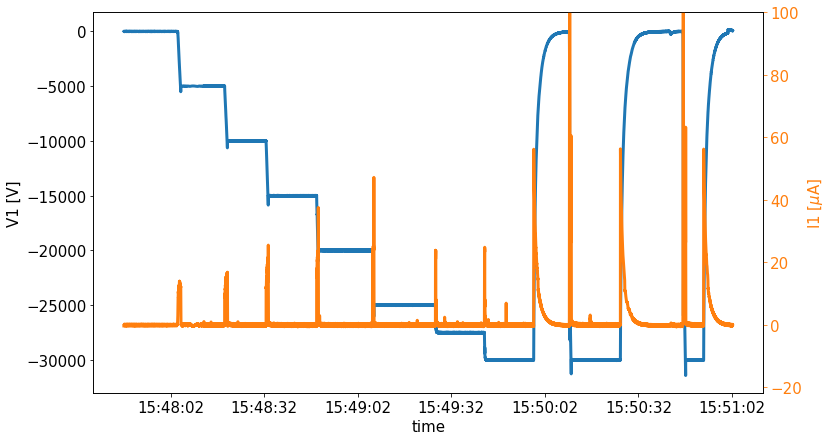

In [4]:
fs = 15

fig, ax = plt.subplots(figsize = (12,7))
ax.plot(data.time, data.V1, lw = 3);
ax.set_xlabel('time', fontsize = fs)
ax.set_ylabel('V1 [V]', fontsize = fs)
ax.tick_params(axis='both', which='major', labelsize=fs);
ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
ax1 = ax.twinx()
ax1.plot(data.time, data.I1, 'C1', lw = 3);
ax1.set_ylabel(r'I1 [$\mu$A]', fontsize = fs, color = 'C1')
ax1.set_ylim(ymax = 100)
ax1.tick_params('y', colors='C1');
ax1.tick_params(axis='both', which='major', labelsize=fs);